In [1]:
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
file_dir = os.getcwd()[:-7] + "/Cleansed/"
file_neg = os.listdir(file_dir + "negative")
file_pos = os.listdir(file_dir + "positive")


In [4]:
df_pos = pd.DataFrame()
for file in file_pos:
    df = pd.read_csv(file_dir + "/positive/" + file, index_col=0)
    df = df.transpose()

    x = df.values
#     x.shape
    x = StandardScaler().fit_transform(x) # normalizing the features
    data_PCA = PCA(n_components=1)
    pca_values = data_PCA.fit_transform(x)
    df_pos = pd.concat([df_pos, pd.DataFrame(pca_values.transpose())], ignore_index=True)

df_pos
    
    

,0,1,2,3,4,5
0,-58.530580,-39.367594,-55.401772,269.148817,-58.205164,-57.643707
1,-28.500573,-148.857548,-26.708968,261.213459,-28.575458,-28.570913
2,-28.180181,-21.407660,-27.556941,133.389387,-28.098914,-28.145693
3,-54.233660,-43.214370,-51.485712,257.398127,-54.306465,-54.157919
4,-42.682480,-53.075543,-39.978731,221.014658,-42.647502,-42.630402
...,...,...,...,...,...,...
152,-55.454253,-67.094262,-53.987393,287.452847,-55.486969,-55.429969
153,-56.885314,18.549773,-52.378337,203.522903,-56.732958,-56.076067
154,-83.192457,125.925658,-81.390586,204.624736,-83.091715,-82.875636
155,-54.525141,-48.242764,-52.692233,264.399747,-54.528499,-54.411111


In [5]:
df_pos['type'] = 'pos'
df_pos

,0,1,2,3,4,5,type
0,-58.530580,-39.367594,-55.401772,269.148817,-58.205164,-57.643707,pos
1,-28.500573,-148.857548,-26.708968,261.213459,-28.575458,-28.570913,pos
2,-28.180181,-21.407660,-27.556941,133.389387,-28.098914,-28.145693,pos
3,-54.233660,-43.214370,-51.485712,257.398127,-54.306465,-54.157919,pos
4,-42.682480,-53.075543,-39.978731,221.014658,-42.647502,-42.630402,pos
...,...,...,...,...,...,...,...
152,-55.454253,-67.094262,-53.987393,287.452847,-55.486969,-55.429969,pos
153,-56.885314,18.549773,-52.378337,203.522903,-56.732958,-56.076067,pos
154,-83.192457,125.925658,-81.390586,204.624736,-83.091715,-82.875636,pos
155,-54.525141,-48.242764,-52.692233,264.399747,-54.528499,-54.411111,pos


In [6]:
df_neg = pd.DataFrame()
for file in file_neg:
    df = pd.read_csv(file_dir + "/negative/" + file, index_col=0)
    df = df.transpose()

    x = df.values
#     x.shape
    x = StandardScaler().fit_transform(x) # normalizing the features
    data_PCA = PCA(n_components=1)
    pca_values = data_PCA.fit_transform(x)
    df_neg = pd.concat([df_neg, pd.DataFrame(pca_values.transpose())], ignore_index=True)


df_neg
    
    

,0,1,2,3,4,5
0,-57.111354,84.835814,-56.142923,142.697881,-57.204454,-57.074962
1,-66.487947,-43.739143,-65.224261,307.522073,-66.362456,-65.708265
2,-54.235979,-55.998689,-49.872552,268.373149,-54.146852,-54.119078
3,-17.743802,-16.860316,-16.962072,86.850627,-17.541340,-17.743097
4,-47.996970,-46.531712,-46.630520,236.769286,-47.877007,-47.733077
...,...,...,...,...,...,...
192,-61.604708,-48.346873,-59.938636,292.980809,-61.589891,-61.500701
193,-87.779407,65.405605,-86.670108,284.525324,-87.692400,-87.789015
194,-74.319017,-20.659884,-72.685107,314.769197,-73.395289,-73.709899
195,-37.902093,214.927648,-36.287730,-65.515717,-37.683912,-37.538196


In [7]:
df_neg['type'] = 'neg'
df_neg

,0,1,2,3,4,5,type
0,-57.111354,84.835814,-56.142923,142.697881,-57.204454,-57.074962,neg
1,-66.487947,-43.739143,-65.224261,307.522073,-66.362456,-65.708265,neg
2,-54.235979,-55.998689,-49.872552,268.373149,-54.146852,-54.119078,neg
3,-17.743802,-16.860316,-16.962072,86.850627,-17.541340,-17.743097,neg
4,-47.996970,-46.531712,-46.630520,236.769286,-47.877007,-47.733077,neg
...,...,...,...,...,...,...,...
192,-61.604708,-48.346873,-59.938636,292.980809,-61.589891,-61.500701,neg
193,-87.779407,65.405605,-86.670108,284.525324,-87.692400,-87.789015,neg
194,-74.319017,-20.659884,-72.685107,314.769197,-73.395289,-73.709899,neg
195,-37.902093,214.927648,-36.287730,-65.515717,-37.683912,-37.538196,neg


<AxesSubplot:xlabel='cycle_number', ylabel='cycle_number'>

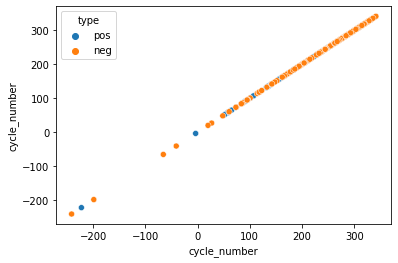

In [54]:
import seaborn as sns
sns.scatterplot(data=df_all, x='cycle_number', y='cycle_number', hue='type')

In [24]:
df_all

,peak_amplitude,integral,phase_angle,cycle_number,rise_time,pulse_width,type
0,-58.530580,-39.367594,-55.401772,269.148817,-58.205164,-57.643707,pos
1,-28.500573,-148.857548,-26.708968,261.213459,-28.575458,-28.570913,pos
2,-28.180181,-21.407660,-27.556941,133.389387,-28.098914,-28.145693,pos
3,-54.233660,-43.214370,-51.485712,257.398127,-54.306465,-54.157919,pos
4,-42.682480,-53.075543,-39.978731,221.014658,-42.647502,-42.630402,pos
...,...,...,...,...,...,...,...
349,-61.604708,-48.346873,-59.938636,292.980809,-61.589891,-61.500701,neg
350,-87.779407,65.405605,-86.670108,284.525324,-87.692400,-87.789015,neg
351,-74.319017,-20.659884,-72.685107,314.769197,-73.395289,-73.709899,neg
352,-37.902093,214.927648,-36.287730,-65.515717,-37.683912,-37.538196,neg


In [8]:
df_all = pd.concat([df_pos, df_neg]).reset_index(drop=True)

In [10]:
df_all.to_csv(file_dir + "df_all.csv", 
              header=['peak_amplitude', 'integral', 'phase_angle','cycle_number','rise_time', 'pulse_width', 'type'], 
              index=False)

## Testing 

In [ ]:
df = pd.read_csv(file_dir + "/negative/" + file_neg[0], index_col=0)
df

In [ ]:
df = df.transpose()
df

In [ ]:

x = df.values
x.shape
x = StandardScaler().fit_transform(x) # normalizing the features

In [ ]:
data_PCA = PCA(n_components=1)

In [ ]:
pca_df = data_PCA.fit_transform(x)
pca_df.size

In [ ]:
pd.DataFrame(pca_df)